In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [33]:
conn = sqlite3.connect("../db.sqlite3")

query = '''
        SELECT restaurant_orderitem.*, restaurant_order.datetime, restaurant_product.price, restaurant_product.name
        FROM restaurant_orderitem
        RIGHT JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
        RIGHT JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id;
'''

df = pd.read_sql_query(query, conn)

conn.close()

df.to_csv("order.csv", index=False)

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

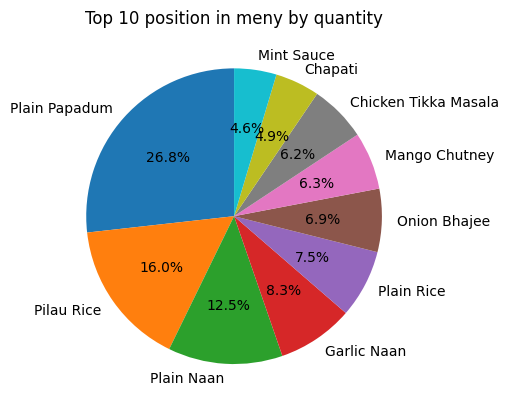

In [39]:
top_products = df.groupby("name")["quantity"].sum().nlargest(10).reset_index()

plt.pie(top_products["quantity"], labels=top_products["name"], autopct="%1.1f%%", startangle=90)
plt.title("Top 10 position in meny by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

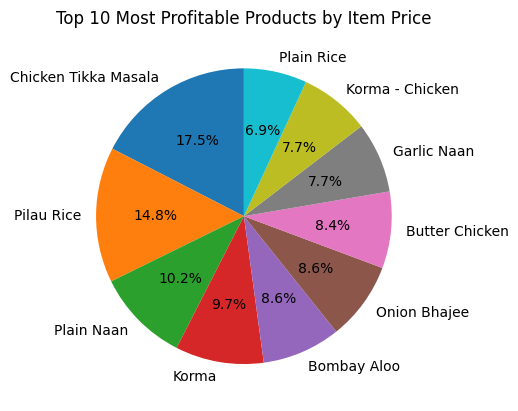

In [41]:
df["item_price"] = df["price"] * df["quantity"]

top_products_by_price = df.groupby("name")["item_price"].sum().nlargest(10).reset_index()

plt.pie(top_products_by_price["item_price"], labels=top_products_by_price["name"], autopct="%1.1f%%", startangle=90)
plt.title("Top 10 Most Profitable Products by Item Price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

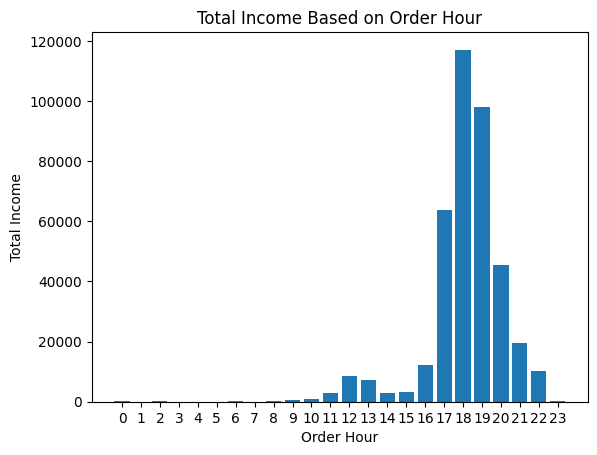

In [49]:
df["order_hour"] = pd.to_datetime(df["datetime"]).dt.hour

hourly_income = df.groupby("order_hour")["price"].sum().reset_index()

plt.bar(hourly_income["order_hour"], hourly_income["price"])
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Total Income Based on Order Hour")
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

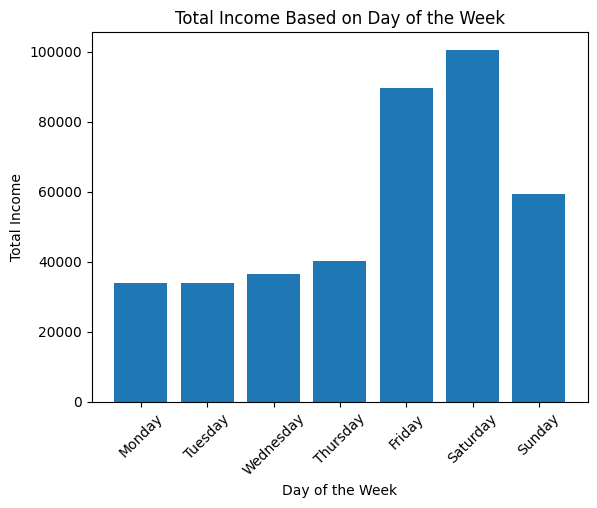

In [52]:
df["day_order"] = pd.to_datetime(df["datetime"]).dt.dayofweek

daily_income = df.groupby("day_order")["price"].sum().reset_index()

day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_income["day_order"] = daily_income["day_order"].map(dict(enumerate(day_names)))

plt.bar(daily_income["day_order"], daily_income["price"])
plt.xlabel("Day of the Week")
plt.ylabel("Total Income")
plt.title("Total Income Based on Day of the Week")
plt.xticks(rotation=45)
plt.show()